# 混沌與可預報度 hw1

## Question 1

### (a) 在 $(x,y,z)=(0,0,0)$ 的線性化與穩定性判定

Lorenz63 系統:

$$
\begin{equation}
\left\{
\begin{aligned}
\frac{dx}{dt} &= \sigma (y - x) \\
\frac{dy}{dt} &= x(\rho - z) - y \\
\frac{dz}{dt} &= xy - \beta z
\end{aligned}
\right.
\end{equation} \tag{1}
$$


**假設**在平衡點附近線性化 $\begin{equation} \left\{ \begin{aligned}  x&= x_{ref} +\delta x \\ y &= y_{ref} +\delta y \\ z &= z_{ref} +\delta z \end{aligned} \right.\end{equation}$ 則可得到線性化的矩陣形式和 $J(x,y,z)$

$$
\frac{d}{dt} \begin{bmatrix}\delta x\\ \delta y\\ \delta z\\ \end{bmatrix} =
\underbrace{\begin{bmatrix}
-\sigma & \sigma & 0\\
\rho - z & -1 & -x\\
y & x & -\beta
\end{bmatrix}}_{J(x,y,z)}
\begin{bmatrix}\delta x\\ \delta y\\ \delta z\\ \end{bmatrix}
$$

計算 $J(0,0,0)$ 的三個特徵值並根據題目給定的參數（$\sigma=10,\ \beta=\tfrac{8}{3},\ \rho=24.74$）判斷穩定性

$$
\begin{aligned}
J(0,0,0) \mathbf{v} &= \lambda \mathbf{v} \\
\det(J(0,0,0) - \lambda I) &= 0 \\
-(\beta +\lambda)((\sigma +\lambda)(1+\lambda)-\rho \sigma)&= 0
\end{aligned}
$$

$$
\lambda = ( -\beta,\quad \frac{-(\sigma+1)}{2}+\frac{1}{2}\sqrt{(\sigma+1)^2-4\sigma(1-\rho)},\quad \frac{-(\sigma+1)}{2}-\frac{1}{2}\sqrt{(\sigma+1)^2-4\sigma(1-\rho)} \quad ) \\
\lambda \approx (-2.66666667,\; 10.86001222,\; -21.86001222 )
$$
  
解釋與結論：

* 有一個特徵值 $\lambda\approx 10.86001222>0$ :表示存在一個沿該特徵向量的**指數發散的mode**，系統在原點是不穩定的
* 其它兩個特徵值為負則表示在對應方向上是收斂的，但由於存在正實部的特徵值所以整體還是不穩定

---

### (b)在其他點作穩定性判定

其他點的 $\lambda$ 解析解恐怕不是那麼好求，以下跑了10個隨機的點求特徵值分析穩定性，可以觀察到一些事情:

1. **恆有一個大負實的特徵值(−18 到 −22)**

   每個random seed都有一個明顯負且絕對值相較於大的實數特徵值(`-20.08, -22.00, -19.73, ...`)，表示在每個參考點都存在一個**強烈收縮方向**

2. **其餘兩個特徵值在不同seed間會切換型態**

   * 兩個特徵值有時是一對**複共軛**(例如 `2.16 ± 7.48i`, `2.79 ± 7.41i`)，表現為螺旋發散($\Re[\lambda]>0$)、螺旋收縮($0>\Re[\lambda]$)
   * 兩個特徵值有時是兩個**實根**（例如 `(9.1276 ,-0.79036)`, `(7.8942,-1.83039)`，通常一正一負(saddle)

3. **特徵向量方向有共同性(可能因為我取的空間太近了)**

   * 對於那個大負特徵值，對應的特徵向量x,y分量往往大小相近、符號相反(例如 [-0.70, 0.71, 0.06] 或 [0.64, -0.73, -0.21])，z分量較小

   * 對應到複共軛的兩個向量常在z分量有較大權重，表明那對振盪行為在z分量上貢獻較大

   
   一個快速收縮方向主要在x-y平面有分量，而振盪/展開分量常有z分量


Lorenz63 的混沌機制需要同時有**局部展開**和**收縮**，數據觀察到的恆定大負值提供了收縮；其它一正(或複共軛實部正)的特徵值提供了展開/旋轉，導致軌道在相空間被拉長和壓扁的根源

而從數學上來看 $\mathrm{Tr}(J) < 0$ 表示該渾沌模型的體積將會不斷縮小並在無限次疊代後被壓縮到一個平面






### (c) 方程組(1)忽略 $z$ 做顯式Euler時間離散，並與放大因子比較

#### 連續系統的特徵值

忽略 $z$ 和(a)一樣**假設**在平衡點附近線性化 $\begin{equation} \left\{ \begin{aligned}  x&= x_{ref} +\delta x \\ y &= y_{ref} +\delta y \end{aligned} \right.\end{equation}$ 則可得到線性化的矩陣形式和時間連續的$J_c(x,y)$

$$
\frac{d}{dt} \begin{bmatrix}\delta x\\ \delta y\\ \end{bmatrix} =
\underbrace{\begin{bmatrix}
-\sigma & \sigma \\
\rho & -1 \\
\end{bmatrix}}_{J_c(x,y)}
\begin{bmatrix}\delta x\\ \delta y\\ \end{bmatrix}
$$

計算 $J_c(0,0)$ 的兩個特徵值並帶入題目給定的參數（$\sigma=10,\ \beta=\tfrac{8}{3},\ \rho=24.74$）

$$
\begin{aligned}
J_c(0,0) \mathbf{v} &= \lambda_c \mathbf{v} \\
\det(J_c(0,0) - \lambda_c I) &= 0 \\
(\sigma +\lambda_c)(1+\lambda_c)-\rho \sigma&= 0
\end{aligned}
$$

$$
\lambda_c = ( \frac{-(\sigma+1)}{2}+\frac{1}{2}\sqrt{(\sigma+1)^2-4\sigma(1-\rho)},\quad \frac{-(\sigma+1)}{2}-\frac{1}{2}\sqrt{(\sigma+1)^2-4\sigma(1-\rho)} \quad ) \\
\boxed{\lambda_c \approx (10.86001222,\; -21.86001222  )}
$$
  
#### 離散系統的特徵值


$$
\dot{\mathbf{x}}^{n+1} = J_c \mathbf{x}^n,\qquad
\mathbf{\mathbf{x}^{n}}=\begin{bmatrix}x\\y\end{bmatrix},\quad
J_c=\begin{bmatrix}-\sigma & \sigma\\ \rho & -1\end{bmatrix}.
$$

顯式Euler（forward Euler）離散時間步長 $\Delta t$：


$$
\begin{aligned}
\mathbf{x}^{n+1} &= \mathbf{x}^n + \Delta t J_c \mathbf{x}^n = (I+\Delta t J_c)\mathbf{x}^n \\
&= M(\Delta t)\,\mathbf{x}^n,\qquad M\stackrel{\mathrm{let}}{=}I + \Delta t\,J_c
\end{aligned}
$$

若假設解呈比例增長（$\mathbf{x}^n\propto \lambda^n_d$），則 $\lambda_d$ 為 $M$ 的特徵值。當 $\Delta t$ 很小時，$\boxed{\lambda_d \approx 1 + \lambda_c \Delta t}$

#### 放大因子( $\lambda_d$ )與穩定條件


* 若Lorenz63在連續系統是收縮 $\Re[\lambda_c]<0$ ，要在離散上也呈衰減必須滿足 $\left| \lambda_d \right| <1 $

  $$
  \left|1+\Delta t \lambda_c \right| < 1
  $$

  若 $\lambda_c$ 為實負數(例如 $\lambda_{c1} \approx -21.86$ )，這給出條件
  
  $$
  -1 < 1 -21.86\Delta t < 1 \quad\Longrightarrow\quad \boxed{ 0 < \Delta t < \frac{2}{21.86}\approx 0.0915 }
  $$

  也就是對 $\lambda_{c1}$ 這個快速負模態，顯式Euler的 $\Delta t$ 要小於約 0.0915 才不會在數值上變成振盪或放大。

* 若Lorenz63在連續系統是不穩定 $\Re[\lambda_c]>0$ ，例如($\lambda_{c2} \approx 10.86)$，則離散放大因子為 $\lambda_d=1+\Delta t\cdot10.86>1$ (對任何 $\Delta t_d>0)$，因此離散也會表現為放大 $(|\lambda|>1)$ 。這與連續系統一致都是不穩定，但數值的**成長速率/每步放大倍數**會因 $\Delta t$ 而不同。

#### 精度比較:離散放大 $\lambda_d$ 和 連續真解的每步成長 $e^{\lambda_c \Delta t}$

連續系統的增長因子是 $e^{\lambda_c \Delta t}$

$$
e^{\lambda_c\Delta t}=1+\lambda_c\Delta t+\frac{1}{2}\lambda_c^2\Delta t^2+\mathcal{O}(\Delta t^3)
$$

因此誤差的主項約為 $\frac{1}{2}\lambda_c^2\Delta t^2$ ，若想讓離散放大因子與連續真解接近，則需要絕對誤差小或是相對誤差小。用絕對誤差估計會得到

$$
\frac{1}{2} \left| \lambda_c \right|^2\Delta t^2 \ll \left|\lambda_c\right| \Delta t \quad\Rightarrow\quad \Delta t \ll \frac{1}{\left|\lambda_c\right|}.
$$

用相對誤差估計，並要求相對誤差 $< 10\% $ 會得到：

$$
\frac{ \frac{1}{2} \left| \lambda_c \right|^2\Delta t^2 } {\left|\lambda_c\right| \Delta t }< 10\% \quad\Rightarrow\quad \Delta t < \frac{0.2}{\left|\lambda_c\right|}
$$

代入數值：

* 對快速負模態( $\left|\lambda_{c1}\right|\approx 21.86$ ): $\boxed{\begin{equation} \left\{ \begin{aligned}  \Delta t& \ll 0.0457 \\ \Delta t& < 0.0091 \end{aligned} \right.\end{equation}}$
* 對正模態 ( $\left|\lambda_{c2}\right|\approx 10.86$ ):$\boxed{\begin{equation} \left\{ \begin{aligned}  \Delta t& \ll 0.0921 \\ \Delta t& < 0.0184 \end{aligned} \right.\end{equation}}$


#### $\Delta t$ 選取

* 當 $0.0915<\Delta t$ ，則離散系統的放大因子在本應衰減的模式在數值上發散、在成長和衰減處與連續系統的相對誤差也會大於 $10\%$

* 當 $\underline{0<\Delta t<0.0091}$ ，則離散系統的放大因子在衰減處可以變小、在成長和衰減處與連續系統的相對誤差也會小於 $10\%$


## Question 2

### 1. Euler和RK4的比較討稐

透過數值實驗中比較了 **Forward Euler** 與 **RK4** 在 Lorenz 系統下的穩定性表現，固定積分時間 $T=50$ 並針對不同時間步長 $\Delta t$ 檢視是否能夠維持蝴蝶吸引子的結構。

在數值模擬中:

* **Euler 方法**：在 $\underline{\Delta t= 0.02}$ 時仍能維持蝴蝶吸引子的結構，但到了 $\Delta t= 0.05$ 時解便快速發散，數值軌跡爆掉、失去了物理解釋。

* **RK4 方法**：RK4 在 $\underline{\Delta t = 0.08}$ 時仍然穩定，但到了 $\Delta t = 0.1$ 就明顯失效。

綜合來看，Euler 方法的可接受步長上限約在 $\Delta t \approx 0.02$ ，而 RK4 則可放寬到 $\Delta t \approx 0.08$ ，這與直覺上「高階方法具有更大穩定域與更高精度」的預期一致。RK4在Loremz63提供了約 **4 倍於 Euler 的最大可行時間步長**。

![](fig/hw1-2_lorenz_stability.png)

```{note}
為了確保RK4真的在Δt=0.1不是因為積分時間不夠(T=50)而無法畫出蝴蝶，特意跑一組1000倍積分時間T=50000的個案，也確定畫不出蝴蝶。
至此就可以說明Δt=0.1是RK4的上限。
```

![](fig/hw1-2_lorenz_stability_note.png)

---
### 2. 精度主導時 $\Delta t$ 在RK4應該比Euler多多少

如果不考慮「穩定性」這個硬限制只用「誤差階數」比較：

* Euler 誤差：$O(\Delta t^1)$
* RK4 誤差：$O(\Delta t^4)$

要達到相同誤差 $\varepsilon$ ，兩者的 Δt 應滿足

$$
(\Delta t_{\text{Euler}})^1 \sim (\Delta t_{\text{RK4}})^4
\implies \Delta t_{\text{RK4}} \sim (\Delta t_{\text{Euler}})^{1/4}
$$

或者寫成 **RK4可以比Euler大多少倍**

$$
\frac{\Delta t_{\text{RK4}}}{\Delta t_{\text{Euler}}} \sim \frac{1}{\Delta t_{\text{Euler}}^{3/4}} \sim 18.8 \big|_{\Delta t_{\text{Euler}}=0.02}
$$

但在數值上RK4只有Euler大4倍可能是Lorenz系統特有的結果，要再使用Question 1的方式計算RK4 $\Delta t$ 的穩定性、收斂適用區間


## Question 3


### 1. ODE-1

$$
\frac{dx}{dt} = -3x  \\
x(t) = x_0 e^{-3t}
$$

For decaying systems, the **characteristic time** is the **efolding time**.

$$
\underline {\tau = \frac{1}{\text{decay rate}} = \frac{1}{3}}
$$


---

### 2. ODE-2

$$
\frac{d^2x}{dt^2} + 9x = 0 \\
\frac{d^2x}{dt^2} + \omega^2 x = 0 \implies \omega = \pm 3
$$

For oscillating systems, the **characteristic time** is the **inverse of angular frequency**

$$
\underline {\tau = \frac{1}{\omega} = \frac{1}{3}}
$$


---

### 3. Forced ODE

$$
\frac{d^2x}{dt^2} + 9x = k \sin(\frac{t}{k}),\quad k \in \mathbb{R}^+
,x(0)=0,x'(0)=1
$$
#### Laplace transform


$$
\begin{aligned}
\frac{d^2x}{dt^2} + 9x &= k \sin(\frac{t}{k}) \\
\mathcal{L}[x''] + 9 \mathcal{L}[x] &= k \mathcal{L}[\sin(\frac{t}{k})] \\
s( sX(s) -  x(0)) - x'(0)+ 9 X(s)&= k \cdot \frac{1/k}{s^2 + (1/k)^2} \\
s^2 X(s) - 1 + 9 X(s) &= \frac{1}{s^2 + 1/k^2} \\
X(s) &= \frac{1}{s^2 + 9} + \frac{1}{(s^2+9)(s^2 + 1/k^2)} \\
X(s) &= \frac{1}{s^2 + 9} + \frac{-k^2}{9k^2-1}\frac{1}{3}\frac{3}{(s^2+9)}+\frac{k^2}{9k^2-1}k\frac{1/k}{(s^2 + 1/k^2)} \\
x(t) &= \underbrace{\frac{1}{3} \sin(3t)}_{\text{homogeneous from IC}} +
\underbrace{\frac{1}{3}\frac{-k^2}{9k^2-1}\sin(3t)+\frac{k^3}{9k^2-1}\sin(\frac{t}{k})}_{\text{forced response term}}
\end{aligned}
$$

---

#### Dominant term

* Homogeneous solution 的頻率 $\omega_{hom} = 3 \Rightarrow \tau_{hom} = \frac{1}{3}$
* Forcing 的頻率 $\omega_f = \frac{1}{k} \Rightarrow \tau_{forcing} = k$
* Forcing 碰到系統的響應頻率 $\omega_s = 3 \Rightarrow \tau_{s} = \frac{1}{3}$

**Dominant term頻率分段討論**

1. **Slow forcing:** $k \gg \frac{1}{3} $ → 以系統的自然震盪頻率為主$\tau \approx \frac{1}{3}$ characteristic time是 $\frac{1}{3}$ ， $x(t)$ 會緩慢隨時間增長

$$
\begin{aligned}
&\lim_{k \gg 1/3}[\frac{1}{3} \sin(3t)+ \frac{1}{3}\frac{-k^2}{9k^2-1}\sin(3t)+\frac{k^3}{9k^2-1}\sin(\frac{t}{k})] \\
&\lim_{k \gg 1/3}[\frac{1}{3} \sin(3t)+ \frac{1}{3}\frac{-k^2}{9k^2}\sin(3t)+\frac{k^3}{9k^2}\sin(\frac{t}{k})] \\
= & \frac{1}{3} \sin(3t)+ \frac{1}{3}\frac{-1}{9}\sin(3t)+\frac{1}{9}t
\end{aligned}
$$

2. **Fast forcing:** $k \ll \frac{1}{3}$ → 以系統的自然震盪頻率為主$\tau \approx \frac{1}{3}$ characteristic time是 $\frac{1}{3}$

$$
\begin{aligned}
&\lim_{k \to 0}[\frac{1}{3} \sin(3t)+ \frac{1}{3}\frac{-k^2}{9k^2-1}\sin(3t)+\frac{k^3}{9k^2-1}\sin(\frac{t}{k})] \\
= & \frac{1}{3} \sin(3t)+ 0
\end{aligned}
$$

3. **Resonance:**  $k \approx \frac{1}{3}$ → 外力的頻率和系統的自然震盪頻率接近→ 共振(震幅變無限大) → characteristic time 會接近 $\frac{1}{3}$


## Question 4

### 0. 證明 推導

$$\frac{\partial q}{\partial t}+J(\psi,q)=D
\quad\Longrightarrow\quad
\left\{ \begin{aligned}  
\frac{\partial\overline{q}}{\partial t}&=-\frac{\partial}{\partial y}\overline{v'q'}+\overline{D}
\\
\frac{1}{2}\frac{\partial \overline{q'^2}}{\partial t}
&=-\overline{v' q'} \frac{\partial \overline{q}}{\partial y}+\overline{D' q'} \end{aligned} \right.
$$

#### 推啊!!! 第一式

$$\frac{\partial q}{\partial t}+J(\psi,q)=D
\quad\Longrightarrow\quad
\frac{\partial\overline{q}}{\partial t}=-\frac{\partial}{\partial y}\overline{v'q'}+\overline{D}
$$

對原式對x軸取平均
$$
\underbrace{\overline{\frac{\partial q}{\partial t}}}_{\text{part A}}+\underbrace{\overline{J(\psi,q)}}_{\text{part B}}=\underbrace{\overline{D}}_{\text{part C}}
$$

1. part A

*  對x的平均可以直接和partial t 交換次序、

$$
\begin{aligned}  
\overline{\frac{\partial q}{\partial t}}  &=\overline{\frac{\partial \overline{q}+q'}{\partial t}} \\
&=\overline{\frac{\partial \overline{q}}{\partial t}}+\overline{\frac{\partial q'}{\partial t}} \\
&=\frac{\partial \overline{q}}{\partial t}+\frac{\partial \overline{q'}}{\partial t}
\end{aligned}
$$

2. part B


$$
\begin{aligned}  
\overline{J(\psi,q)}  &=\overline{u\frac{\partial q}{\partial x}+v\frac{\partial q}{\partial y}} +(\overline{q\frac{\partial u}{\partial x}+q\frac{\partial v}{\partial y}} -\overline{q(\frac{\partial u}{\partial x}+\frac{\partial v}{\partial y})})\\
&=\overline{\frac{\partial uq}{\partial x}+\frac{\partial vq}{\partial y}}-\overline{q(\frac{\partial u}{\partial x}+\frac{\partial v}{\partial y})} \\
&=\overline{\frac{\partial uq}{\partial x}}+\frac{\partial \overline{vq}}{\partial y}-\overline{q(\frac{\partial u}{\partial x}+\frac{\partial v}{\partial y})} \\
&=\overline{\frac{\partial uq}{\partial x}}+\frac{\partial \overline{\bar v\bar q}+\overline{\bar v q'}+\overline{v'\bar q}+\overline{v' q'}}{\partial y}-\overline{q(\frac{\partial u}{\partial x}+\frac{\partial v}{\partial y})} \\
&=\overline{\frac{\partial uq}{\partial x}}+\frac{\partial \bar v\bar q+\bar v \overline{q'}+\overline{v'}\bar q}{\partial y}+\frac{\partial \overline{v' q'}}{\partial y}-\overline{q(\frac{\partial u}{\partial x}+\frac{\partial v}{\partial y})}
\end{aligned}
$$

3. part C

$$
\begin{aligned}  
\overline{D}  &=\overline{\overline{D}+D'} \\
&=\overline{\overline{D}}+\overline{D'} &=\overline{D}+\overline{D'}
\end{aligned}
$$

4. part A + part B = part C

$$
\begin{aligned}  
\overline{\frac{\partial q}{\partial t}}&+\overline{J(\psi,q)}&=&\overline{D} \\
\frac{\partial \overline{q}}{\partial t}+\frac{\partial \overline{q'}}{\partial t} &+\overline{\frac{\partial uq}{\partial x}}+\frac{\partial \bar v\bar q+\bar v \overline{q'}+\overline{v'}\bar q}{\partial y}+\frac{\partial \overline{v' q'}}{\partial y}-\overline{q(\frac{\partial u}{\partial x}+\frac{\partial v}{\partial y})} &=&\overline{D}+\overline{D'}
\end{aligned}
$$

* 根據zonal mean 定義 $\overline{q'}=0,\quad \overline{v'}=0,\quad \overline{D'}=0$
* 根據週期性邊界假設 $\overline{\frac{\partial A}{\partial x}}:\quad \overline{\frac{\partial uq}{\partial x}}=0,\quad \overline{v}=0$
* 根據不可輻合輻散假設 $\frac{\partial u}{\partial x}+\frac{\partial v}{\partial y}=0$

$$  
\boxed{\frac{\partial\overline{q}}{\partial t}+\frac{\partial}{\partial y}\overline{v'q'}=\overline{D}}
$$

#### 推啊!!! 第二式

$$\frac{\partial q}{\partial t}+J(\psi,q)=D
\quad\Longrightarrow\quad
\frac{1}{2}\frac{\partial \overline{q'^2}}{\partial t}
=-\overline{v' q'} \frac{\partial \overline{q}}{\partial y}+\overline{D' q'}
$$

對原式乘 $q'$ 後對x軸取平均

$$
\underbrace{\overline{q'\frac{\partial q}{\partial t}}}_{\text{part A}}+\underbrace{\overline{q'J(\psi,q)}}_{\text{part B}}=\underbrace{\overline{q'D}}_{\text{part C}}
$$

1. part A

*  對x的平均可以直接和partial t 交換次序、

$$
\begin{aligned}  
\overline{q'\frac{\partial q}{\partial t}}  &=\overline{q'\frac{\partial \overline{q}+q'}{\partial t}} \\
&=\overline{q'\frac{\partial \overline{q}}{\partial t}}+\overline{q'\frac{\partial q'}{\partial t}} \\
&=\overline{q'}\frac{\partial \overline{q}}{\partial t}+\frac{1}{2}\frac{\partial \overline{q'^2}}{\partial t}
\end{aligned}
$$

2. part B


$$
\overline{q'J(\psi,q)}  =\underbrace{\overline{q'u\frac{\partial q}{\partial x}}}_{\text{B-1}}+\underbrace{\overline{q'v\frac{\partial q}{\partial y}}}_{\text{B-2}} \\
$$

* part B-1
$$
\begin{aligned}
\overline{q'u\frac{\partial q}{\partial x}}&=\overline{q'(\overline{u}+u')\frac{\partial \overline{q}+q'}{\partial x}} \\
&=\overline{q'\overline{u}\frac{\partial \overline{q}}{\partial x}}+
 \overline{q'\overline{u}\frac{\partial q'     }{\partial x}}+
 \overline{q'u'     \frac{\partial \overline{q}}{\partial x}}+
 \overline{q'u'     \frac{\partial q'     }{\partial x}} \\
&=\overline{q'}\overline{u}\frac{\partial \overline{q}}{\partial x}+
 \frac{1}{2}\overline{\overline{u}\frac{\partial q'^2     }{\partial x}}+
 \overline{q'u'}     \frac{\partial \overline{q}}{\partial x}+
 \frac{1}{2}     \overline{u'\frac{\partial q'^2     }{\partial x}} \\
&=\overline{q'}\overline{u}\frac{\partial \overline{q}}{\partial x}+
 \frac{1}{2}( \overline{\frac{\partial \overline{u}q'^2}{\partial x}}- \overline{q'^2\frac{\partial \overline{u}}{\partial x}}) +
 \overline{q'u'}     \frac{\partial \overline{q}}{\partial x}+
 \frac{1}{2}( \overline{\frac{\partial u'q'^2}{\partial x}}- \overline{q'^2\frac{\partial u'}{\partial x}}) \\
&=\overline{q'}\overline{u}\frac{\partial \overline{q}}{\partial x}+
 \frac{1}{2} \overline{\frac{\partial uq'^2}{\partial x}} +
 \overline{q'u'}     \frac{\partial \overline{q}}{\partial x}-
 \frac{1}{2} \overline{q'^2\frac{\partial u}{\partial x}}
\end{aligned}
$$

* part B-2
$$
\begin{aligned}
\overline{q'v\frac{\partial q}{\partial y}}&=\overline{q'(\overline{v}+v')\frac{\partial \overline{q}+q'}{\partial y}} \\
&=\overline{q'\overline{v}\frac{\partial \overline{q}}{\partial y}}+
 \overline{q'\overline{v}\frac{\partial q'     }{\partial y}}+
 \overline{q'v'     \frac{\partial \overline{q}}{\partial y}}+
 \overline{q'v'     \frac{\partial q'     }{\partial y}} \\
&=\overline{q'}\overline{v}\frac{\partial \overline{q}}{\partial y}+
 \frac{1}{2}\overline{\overline{v}\frac{\partial q'^2     }{\partial y}}+
 \overline{q'v'}     \frac{\partial \overline{q}}{\partial y}+
 \frac{1}{2}     \overline{v'\frac{\partial q'^2     }{\partial y}} \\
&=\overline{q'}\overline{v}\frac{\partial \overline{q}}{\partial y}+
 \frac{1}{2}( \overline{\frac{\partial \overline{v}q'^2}{\partial y}}- \overline{q'^2\frac{\partial \overline{v}}{\partial y}}) +
 \overline{q'v'}     \frac{\partial \overline{q}}{\partial y}+
 \frac{1}{2}( \overline{\frac{\partial v'q'^2}{\partial y}}- \overline{q'^2\frac{\partial v'}{\partial y}}) \\
&=\overline{q'}\overline{v}\frac{\partial \overline{q}}{\partial y}+
 \frac{1}{2} \overline{\frac{\partial vq'^2}{\partial y}} +
 \overline{q'v'}     \frac{\partial \overline{q}}{\partial y}-
 \frac{1}{2} \overline{q'^2\frac{\partial v}{\partial y}}
\end{aligned}
$$

* part B-1 + part B-2 = part B
$$
\begin{aligned}
&=\overline{q'}\overline{u}\frac{\partial \overline{q}}{\partial x}+
 \frac{1}{2} \overline{\frac{\partial uq'^2}{\partial x}} +
 \overline{q'u'}     \frac{\partial \overline{q}}{\partial x}-
 \frac{1}{2} \overline{q'^2\frac{\partial u}{\partial x}} \\
&+\overline{q'}\overline{v}\frac{\partial \overline{q}}{\partial y}+
 \frac{1}{2} \overline{\frac{\partial vq'^2}{\partial y}} +
 \overline{q'v'}     \frac{\partial \overline{q}}{\partial y}-
 \frac{1}{2} \overline{q'^2\frac{\partial v}{\partial y}} \\
&=\overline{q'}\overline{u}\frac{\partial \overline{q}}{\partial x}+
 \frac{1}{2} \overline{\frac{\partial uq'^2}{\partial x}} +
 \overline{q'u'}     \frac{\partial \overline{q}}{\partial x} \\
&+\overline{q'}\overline{v}\frac{\partial \overline{q}}{\partial y}+
 \frac{1}{2} \overline{\frac{\partial vq'^2}{\partial y}} +
 \overline{q'v'}     \frac{\partial \overline{q}}{\partial y}-
 \frac{1}{2} \overline{q'^2(\frac{\partial u}{\partial x}+\frac{\partial v}{\partial y})}
\end{aligned}
$$

3. part C

$$
\begin{aligned}  
\overline{q'D}  &=\overline{q'\overline{D}+q'D'} \\
&=\overline{q'\overline{D}}+q'\overline{D'} \\
&=\overline{q'}\overline{D}+\overline{q'D'}
\end{aligned}
$$

4. part A + part B = part C

$$
\begin{aligned}  
\overline{q'\frac{\partial q}{\partial t}}&+\overline{q'J(\psi,q)}&=&\overline{q'D}\\
\overline{q'}\frac{\partial \overline{q}}{\partial t}+\frac{1}{2}\frac{\partial \overline{q'^2}}{\partial t}&+\overline{q'}\overline{u}\frac{\partial \overline{q}}{\partial x}+
 \frac{1}{2} \overline{\frac{\partial uq'^2}{\partial x}} +
 \overline{q'u'}     \frac{\partial \overline{q}}{\partial x}
 +\overline{q'}\overline{v}\frac{\partial \overline{q}}{\partial y}+
 \frac{1}{2} \overline{\frac{\partial vq'^2}{\partial y}} +
 \overline{q'v'}     \frac{\partial \overline{q}}{\partial y}-
 \frac{1}{2} \overline{q'^2(\frac{\partial u}{\partial x}+\frac{\partial v}{\partial y})} &=&\overline{q'}\overline{D}+\overline{q'D'}
\end{aligned}
$$

* 根據zonal mean 定義 $\overline{q'}=0,\quad \overline{v'}=0,\quad \overline{D'}=0$
* 根據週期性邊界假設 $\overline{\frac{\partial A}{\partial x}}:\quad \overline{\frac{\partial q}{\partial x}}=0,\quad \overline{v}=0$
* 根據不可輻合輻散假設 $\frac{\partial u}{\partial x}+\frac{\partial v}{\partial y}=0$

$$
\begin{aligned}  
\frac{1}{2}\frac{\partial \overline{q'^2}}{\partial t}&+
 \frac{1}{2} (\overline{\frac{\partial uq'^2}{\partial x}} + \overline{\frac{\partial vq'^2}{\partial y}}) +
 \overline{q'v'}     \frac{\partial \overline{q}}{\partial y}&=&\overline{q'D'}
\end{aligned}
$$
擾動渦度能量隨著流場的平流輸送（transport by advection） $-\frac{1}{2}\overline{\nabla \cdot (\mathbf{u} q'^2)}$

* 根據週期性邊界假設 $\overline{\frac{\partial A}{\partial x}}:\quad \overline{\frac{\partial uq'^2}{\partial x}}=0,\quad \overline{v}=0$
* 不確定是不是但是是y的邊界平均意義下沒有能量通量梯度假設 $\frac{\partial \overline{vq'^2}}{\partial y}=0$

$$  
\boxed{\frac{1}{2}\frac{\partial \overline{q'^2}}{\partial t}
+\overline{v' q'} \frac{\partial \overline{q}}{\partial y}=\overline{D' q'}}
$$

### 1. 預報方程式 of mean and variance under some assumption

已知假設Suppose the following:

1. 沒有外部強迫或耗散: $D = 0$

2. 位渦通量的閉合形式:
$$
\overline{v' q'} = -K_q  \partial_y \overline{q}, \quad
K_q = K_0 \big(\overline{q'^2}\big)^{1/2}
$$

注意到**均方擾動 PV $(\overline{q'^2})$ 越大，混合係數 $K_q$ 越大** : 擾動越強 → 混合越強。

---

#### Mean equation


$$
\begin{aligned}  
\frac{\partial \overline{q}}{\partial t}
&= - \frac{\partial}{\partial y} \overline{v' q'} \\
\frac{\partial \overline{q}}{\partial t}
&= -\frac{\partial}{\partial y}\Big[-K_q  \partial_y \overline{q}\Big]
\end{aligned}
$$

👉 注意到這就是一個「擴散型」方程式，不過擴散係數 $K_q$ 不是常數，而是由位渦方差控制。

$$
\boxed{\frac{\partial \overline{q}}{\partial t}
= \frac{\partial}{\partial y}\Big[ K_0  \overline{q'^2}^{1/2} \partial_y \overline{q}\Big]}
$$

---

####  方差方程式

擾動方差方程的一般形式（忽略耗散、輸運）：
$$
\begin{aligned}
\frac{1}{2}\frac{\partial}{\partial t}\overline{q'^2}
&= -\overline{v' q'}  \partial_y \overline{q} \\
&= -\big(-K_q \partial_y \overline{q}\big) \partial_y \overline{q}\\
&= K_q  (\partial_y \overline{q})^2
\end{aligned}
$$
$$
\boxed{\frac{\partial}{\partial t}\overline{q'^2}
= 2 K_0  \overline{q'^2}^{1/2}  (\partial_y \overline{q})^2 }
$$

---

#### 物理意義

* **平均方程：**
  平均場 $\overline{q}$ 會被擾動「平流擴散」趨於平滑，擴散率取決於位渦強度

* **方差方程：**
  位渦方差 $\overline{q'^2}$ 的來源就是平均場的梯度
  梯度越強，能量轉換越大 → 位渦增強

* **交互作用：**

  * 強梯度 $\partial_y \overline{q}$ 會產生擾動 → 增加方差
  * 方差增大 → $K_q$ 增大 → 平均場更快被擴散 → 梯度減弱
  * 這形成一個 **自我調節的負回饋**
  * 如果再加上耗散 $D$ ，系統會趨向平衡


### 2. Simulate this equation numerically

* Condition

$$
\left\{ \begin{aligned}
L\text{(domain length)} &= 2\pi \\
K_0&=0.1 \\
\overline{q}(t=0,y)&=e^{-(y-\pi)^2} \\
\overline{q'^2}(t=0,y)&=0.1e^{-(y-\pi)^2} \\
\text{Boundary condition} &: \text{periodic}
\end{aligned} \right.
$$

* Equation

$$
\left\{ \begin{aligned}
\frac{\partial \overline{q}}{\partial t}
&= \frac{\partial}{\partial y}\Big[ K_0  \overline{q'^2}^{1/2} \partial_y \overline{q}\Big] \\
\frac{\partial}{\partial t}\overline{q'^2}
&= 2 K_0  \overline{q'^2}^{1/2}  (\partial_y \overline{q})^2
\end{aligned} \right.
$$

* Setup

$$
\left\{ \begin{aligned}
dt &= 1*10^{-4} \\
t_{\text{final}} &= 1.0 \\
\text{Space discretization} &: \text{6th order of finite difference} \\
\text{Time discretization} &: \text{RK4} \\
\end{aligned} \right.
$$

---



#### (1) 平均場 $\overline{q}$ 在中心點下降並往兩邊擴散

* **看方程式:**
  $$\partial_t \overline{q} = \partial_y (K_q \partial_y \overline{q})$$
  這是一個 **非線性擴散方程**:

  * $\overline{q}$ 在中心 $y=\pi$ 有尖峰（Gaussian），梯度最大
  * 擴散作用會把中心尖峰抹平帶走能量，所以中心值下降
  * 梯度會把高值的 $\overline{q}$ 往兩邊傳輸，所以 $\overline{q}$ 往外擴散出去

#### (2) 方差 $\overline{q'^2}$ 在中心點不變，但鄰近區域上升

* **看方程式:**
  $$ \frac{1}{2}\partial_t \overline{q'^2} = K_q (\partial_y \overline{q})^2 \ge 0$$
  ⇒ 方差的來源完全來自 **平均場梯度**

* **在中心點:**

  * $\partial_y \overline{q}|_{y=\pi} = 0$（Gaussian 的峰值一階導數為零）
  * 所以中心點沒有方差生成，qvar 在中心點不變

* **在中心附近:**

  * 梯度最大的位置在峰值的兩側$(y \approx \pi \pm \sigma)$
  * 方差生成率正比於 $(\partial_y \overline{q})^2$，所以兩側的產生很強
  * 平均場能量轉換成位渦，使得那裡的狀態變得更不規則、變異度大


![](fig/qbar_4-2.png)

![](fig/qvar_4-2.png)


### 3. Simulate this equation numerically + time-dependent forcing

* Condition

$$
\left\{ \begin{aligned}
L\text{(domain length)} &= 2\pi \\
K_0&=0.1 \\
\overline{q}(t=0,y)&=e^{-(y-\pi)^2} \\
\overline{q'^2}(t=0,y)&=0.1e^{-(y-\pi)^2} \\
\text{Boundary condition} &: \text{periodic}
\end{aligned} \right.
$$

* Equation

$$
\left\{ \begin{aligned}
\frac{\partial \overline{q}}{\partial t}
&= \frac{\partial}{\partial y}\Big[ K_0  \overline{q'^2}^{1/2} \partial_y \overline{q}\Big] -3e^{-\frac{(y-\pi)^2}{2}}\sin(0.3\pi t)\\
\frac{\partial}{\partial t}\overline{q'^2}
&= 2 K_0  \overline{q'^2}^{1/2}  (\partial_y \overline{q})^2 -2e^{-\frac{(y-\pi)^2}{2}}\sin(0.3\pi t)
\end{aligned} \right.
$$

* Setup

$$
\left\{ \begin{aligned}
dt &= 1*10^{-4} \\
t_{\text{final}} &= 10.0 \\
\overline{q'^2} < 0 &: \overline{q'^2}\overset{\mathrm{let}}{=}0 \\
\text{Space discretization} &: \text{6th order of finite difference} \\
\text{Time discretization} &: \text{RK4} \\
\end{aligned} \right.
$$

---

![](fig/qbar_4-3.png)

![](fig/qvar_4-3.png)

#### (1) 平均位渦 $\overline{q}$ 的演變

* Mean PV $\overline{q}$ 相較於沒有外力的情況， $\overline{q}$ 不再只是單純的擴散、變平，而會是 $\overline{q}$ 呈現一種**週期性的上下起伏**:

  * 當外力是正相位時 $(\sin(0.3\pi t) > 0)$，會使 $\overline{q}$ 在中心下降更快
  * 當外力是負相位時$(\sin(0.3\pi t) < 0)$，會使得 $\overline{q}$ 在中心回升
* 所以物理上，外力相當於持續對系統注入一個震盪的驅動，讓平均場在擴散的基礎上，**呈現隨時間的週期擺盪**



#### (2) 方差 $\overline{q'^2}$ 的演變

* Variance $\overline{q'^2}$ 可以明顯看到:

  * 沒有外力時，方差主要是在中心附近逐漸上升，再慢慢往外擴散。
  * 有外力之後，方差的峰值隨著時間產生**週期性震盪**

* 這對應到外力輸入能量的過程:

  * 當外力是正相位時 $(\sin(0.3\pi t) > 0)$，會使 擾動增強、方差上升、流場變得更亂。
  * 當外力是負相位時$(\sin(0.3\pi t) < 0)$，會使得 擾動被部分抑制或轉移，方差下降。
* 物理直觀上，這就像是**一個持續被強迫震動的渦漩場**，渦度梯度與擾動之間的能量交換因外力而呈現交替的強弱。



#### (3) 也就是說

* **沒有外力**：系統靠自身擴散使得 $\overline{q}$ 越來越平滑，$\overline{q'^2}$ 在中心附近先增強再慢慢向外傳播。
* **有外力**：外力持續輸入能量，讓原本單調的擴散過程「加上週期震盪」。

  * $\overline{q}$呈現週期性上下擺動，而不是單純衰減。
  * $\overline{q'^2}$在中心與近旁持續被「激發—釋放」，造成擾動能量的週期波動。

---
#### 細品

本來想很酷的連結Question3分析，但是我發現我太菜了，首先就只觀察$\overline{q}$，不分析 $\overline{q'^2}$ 是因為我做了個條件 $\overline{q'^2}< 0 : \overline{q'^2}\overset{\mathrm{let}}{=}0$ ，但是這工程手段超合理的好吧沒看過負的均方值。

1. $\overline{q}$ 中間值隨時間的變化

* 透過瞪眼法觀察到$\overline{q}$的週期明顯大概落在 $65631dt \approx 6.5631$ ，雖然fft後的結果是大約$50000dt$。
* 這個與Question3-3遇到的情況類似，外力週期 $\frac{2}{0.3} \approx6.66 $ 與瞪眼法觀察到的結果一致。
* 猜測這系統本身並不涉及相位差

![](fig/qbar_center_4-3.png)


# 程式

### Q1(a)

In [ ]:
import numpy as np
from scipy.linalg import eig, solve_continuous_lyapunov


sigma , beta , rho = 10 , 8/3 , 24.74
x_ref , y_ref , z_ref = 0 , 0 , 0

A = np.array([[-sigma , sigma , 0],
        [rho-z_ref , -1 , -x_ref],
        [y_ref , x_ref , -beta]])
w, v = eig(A)             # w = eigenvalues
print("eigenvalues:", w)
print("eigenvector:", v)

eigenvalues: [-21.86001222+0.j  10.86001222+0.j  -2.66666667+0.j]
eigenvector: [[-0.64461164 -0.4322811   0.        ]
 [ 0.76451019 -0.9017389   0.        ]
 [ 0.          0.          1.        ]]


### Q1 (b)

In [ ]:
# Hw1-1-(b)
import numpy as np
from scipy.linalg import eig, solve_continuous_lyapunov
import matplotlib.pyplot as plt


for random_seed in range(10):
  np.random.seed(random_seed)
  print(f'random_seed : {random_seed}')

  sigma , beta , rho = 10 , 8/3 , 24.74
  x_ref , y_ref , z_ref = np.random.rand(3) * 10
  print(f'  x_ref , y_ref , z_ref = {x_ref , y_ref , z_ref}')

  A = np.array([[-sigma , sigma , 0],
          [rho-z_ref , -1 , -x_ref],
          [y_ref , x_ref , -beta]])
  w, v = eig(A)             # w = eigenvalues

  print(" eigenvalues:", w)
  print(" eigenvector:", v)

random_seed : 0
  x_ref , y_ref , z_ref = (np.float64(5.4881350392732475), np.float64(7.151893663724195), np.float64(6.027633760716439))
 eigenvalues: [-20.07687401+0.j          3.20510367+0.8680627j   3.20510367-0.8680627j]
 eigenvector: [[-0.70288306+0.j          0.33795894+0.03859228j  0.33795894-0.03859228j]
 [ 0.7082864 +0.j          0.44292823+0.08029846j  0.44292823-0.08029846j]
 [ 0.06546582+0.j          0.82562772+0.j          0.82562772-0.j        ]]
random_seed : 1
  x_ref , y_ref , z_ref = (np.float64(4.17022004702574), np.float64(7.203244934421581), np.float64(0.0011437481734488664))
 eigenvalues: [-22.00385924+0.j   9.12755557+0.j  -0.790363  +0.j]
 eigenvector: [[ 0.63837659 -0.39793123  0.16553748]
 [-0.76629827 -0.76114518  0.15245401]
 [-0.07254158 -0.51216086  0.97434856]]
random_seed : 2
  x_ref , y_ref , z_ref = (np.float64(4.359949021420038), np.float64(0.25926231827891333), np.float64(5.496624778787091))
 eigenvalues: [-19.73047431+0.j   7.89419785+0.j  -1.830390

### Q2

/tmp/ipython-input-2261422186.py:14: RuntimeWarning: overflow encountered in scalar multiply
  dy = x * (rho - z) - y
/tmp/ipython-input-2261422186.py:15: RuntimeWarning: overflow encountered in scalar multiply
  dz = x * y - beta * z
/tmp/ipython-input-2261422186.py:14: RuntimeWarning: invalid value encountered in scalar subtract
  dy = x * (rho - z) - y
/tmp/ipython-input-2261422186.py:23: RuntimeWarning: invalid value encountered in add
  traj[n+1] = traj[n] + dt * lorenz(traj[n])


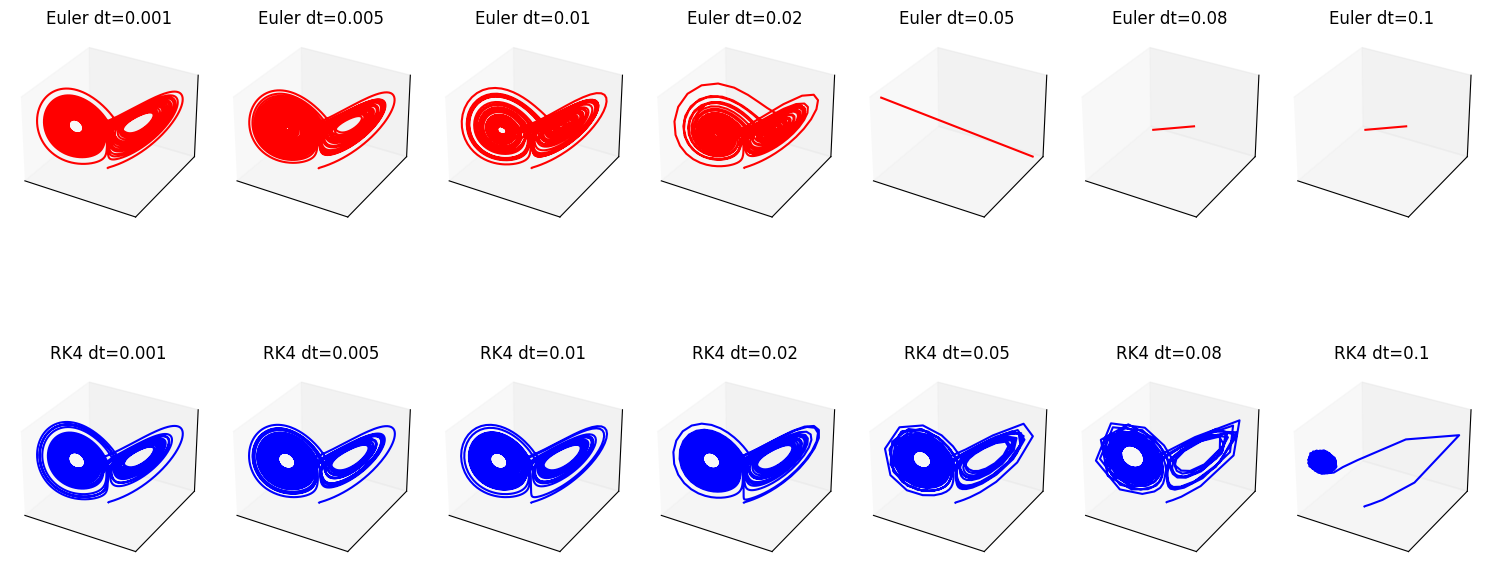

In [ ]:
# Hw1-2-a
import numpy as np
import matplotlib.pyplot as plt

plot_it = False
# Lorenz parameters
sigma = 10.0
beta = 8.0/3.0
rho = 24.74

def lorenz(state):
    x, y, z = state
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    return np.array([dx, dy, dz])

# Forward Euler scheme
def integrate_euler(x0, dt, nsteps):
    traj = np.zeros((nsteps, 3))
    traj[0] = x0
    for n in range(nsteps-1):
        traj[n+1] = traj[n] + dt * lorenz(traj[n])
    return traj

# RK4 scheme
def integrate_rk4(x0, dt, nsteps):
    traj = np.zeros((nsteps, 3))
    traj[0] = x0
    for n in range(nsteps-1):
        k1 = lorenz(traj[n])
        k2 = lorenz(traj[n] + 0.5*dt*k1)
        k3 = lorenz(traj[n] + 0.5*dt*k2)
        k4 = lorenz(traj[n] + dt*k3)
        traj[n+1] = traj[n] + (dt/6.0)*(k1 + 2*k2 + 2*k3 + k4)
    return traj

# Initial condition near equilibrium
x0 = np.array([0.1, 0.0, 0.0])

# Fixed total integration time
T = 50.0

# Candidate dt values
dt_list = [0.001, 0.005, 0.01, 0.02, 0.05, 0.08, 0.1]

if not os.path.exists('fig'):
    os.makedirs('fig')
if plot_it :
  fig = plt.figure(figsize=(15, 8))

  for i, dt in enumerate(dt_list):
      nsteps = int(T / dt)   # 保持 T 固定
      traj_euler = integrate_euler(x0, dt, nsteps)
      traj_rk4 = integrate_rk4(x0, dt, nsteps)

      # Euler plot
      ax = fig.add_subplot(2, len(dt_list), i+1, projection="3d")
      ax.plot(traj_euler[:,0], traj_euler[:,1], traj_euler[:,2], color="red")
      ax.set_title(f"Euler dt={dt}")
      ax.set_xticks([]); ax.set_yticks([]); ax.set_zticks([])

      # RK4 plot
      ax = fig.add_subplot(2, len(dt_list), i+1+len(dt_list), projection="3d")
      ax.plot(traj_rk4[:,0], traj_rk4[:,1], traj_rk4[:,2], color="blue")
      ax.set_title(f"RK4 dt={dt}")
      ax.set_xticks([]); ax.set_yticks([]); ax.set_zticks([])

  plt.tight_layout()
  plt.savefig("fig/hw1-2_lorenz_stability.png")
  plt.show()


/tmp/ipython-input-3082341435.py:14: RuntimeWarning: overflow encountered in scalar multiply
  dy = x * (rho - z) - y
/tmp/ipython-input-3082341435.py:15: RuntimeWarning: overflow encountered in scalar multiply
  dz = x * y - beta * z
/tmp/ipython-input-3082341435.py:15: RuntimeWarning: invalid value encountered in scalar subtract
  dz = x * y - beta * z
/tmp/ipython-input-3082341435.py:23: RuntimeWarning: invalid value encountered in add
  traj[n+1] = traj[n] + dt * lorenz(traj[n])


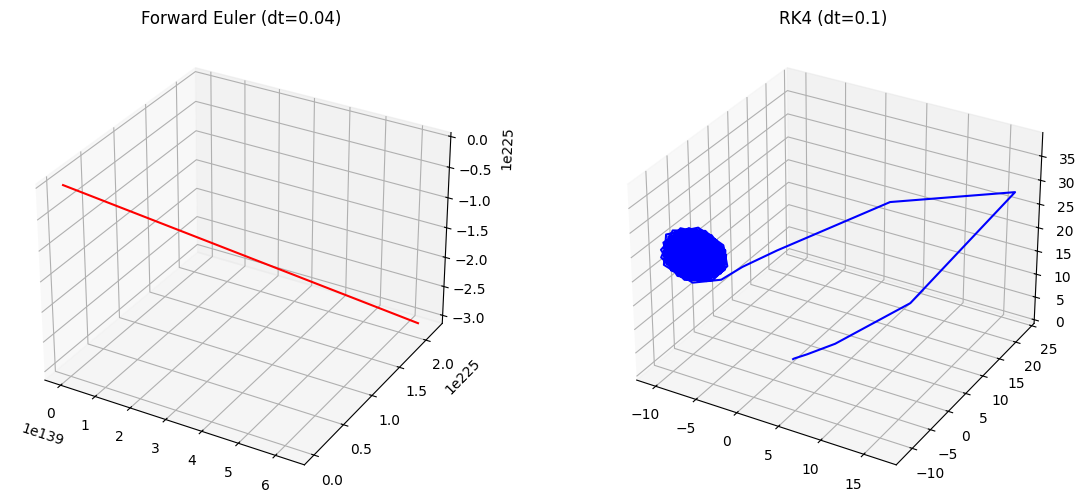

In [ ]:
# Hw1-2-b
import numpy as np
import matplotlib.pyplot as plt

run_it = False
# Lorenz parameters
sigma = 10.0
beta = 8.0/3.0
rho = 24.74

def lorenz(state):
    x, y, z = state
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    return np.array([dx, dy, dz])

# Forward Euler scheme
def integrate_euler(x0, dt, nsteps):
    traj = np.zeros((nsteps, 3))
    traj[0] = x0
    for n in range(nsteps-1):
        traj[n+1] = traj[n] + dt * lorenz(traj[n])
    return traj

# RK4 scheme
def integrate_rk4(x0, dt, nsteps):
    traj = np.zeros((nsteps, 3))
    traj[0] = x0
    for n in range(nsteps-1):
        k1 = lorenz(traj[n])
        k2 = lorenz(traj[n] + 0.5*dt*k1)
        k3 = lorenz(traj[n] + 0.5*dt*k2)
        k4 = lorenz(traj[n] + dt*k3)
        traj[n+1] = traj[n] + (dt/6.0)*(k1 + 2*k2 + 2*k3 + k4)
    return traj

# initial condition near equilibrium
x0 = np.array([0.1, 0.0, 0.0])
if not os.path.exists('fig'):
    os.makedirs('fig')
if run_it :
  # Try Euler
  dt_euler = 0.002 *20 # you can increase this until it blows up (~0.01 might still work, >0.02 unstable)
  steps = 500000
  traj_euler = integrate_euler(x0, dt_euler, steps)

  # Try RK4
  dt_rk4 = 0.1   # RK4 allows larger dt, can even go up to ~0.05 stably
  traj_rk4 = integrate_rk4(x0, dt_rk4, steps)

  # Plot comparison
  fig = plt.figure(figsize=(14,6))

  ax1 = fig.add_subplot(121, projection='3d')
  ax1.plot(traj_euler[:,0], traj_euler[:,1], traj_euler[:,2], color='red')
  ax1.set_title(f"Forward Euler (dt={dt_euler})")

  ax2 = fig.add_subplot(122, projection='3d')
  ax2.plot(traj_rk4[:,0], traj_rk4[:,1], traj_rk4[:,2], color='blue')
  ax2.set_title(f"RK4 (dt={dt_rk4})")

  plt.savefig("fig/hw1-2_lorenz_stability_note.png")
  plt.show()


### Q4-2

1000 0.10000000000000184 (2, 512) (2, 512) (2,)
2000 0.1999999999999943 (3, 512) (3, 512) (3,)
3000 0.2999999999999833 (4, 512) (4, 512) (4,)
4000 0.39999999999997227 (5, 512) (5, 512) (5,)
5000 0.49999999999996125 (6, 512) (6, 512) (6,)
6000 0.5999999999999502 (7, 512) (7, 512) (7,)
7000 0.6999999999999392 (8, 512) (8, 512) (8,)
8000 0.7999999999999282 (9, 512) (9, 512) (9,)
9000 0.8999999999999172 (10, 512) (10, 512) (10,)
10000 0.9999999999999062 (11, 512) (11, 512) (11,)


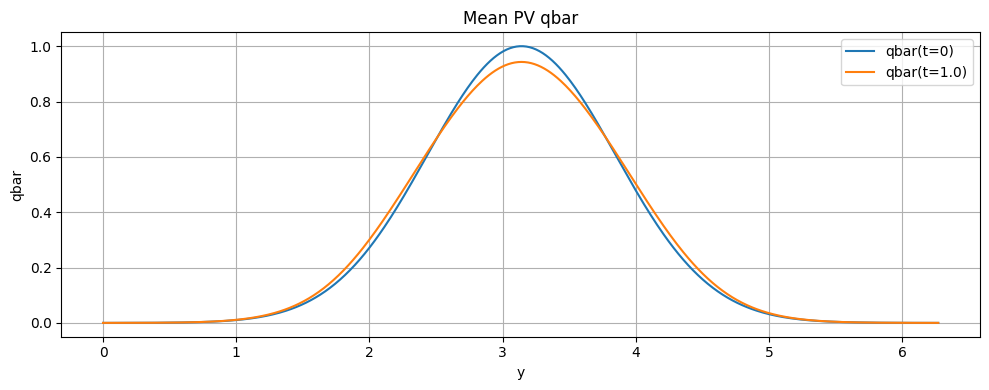

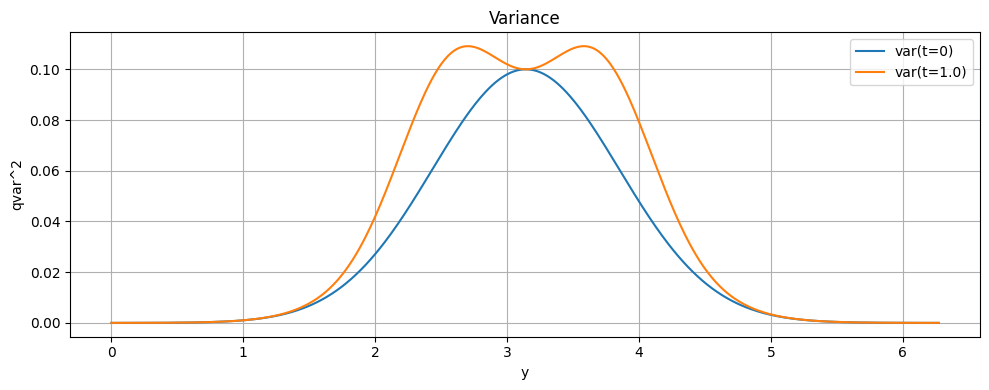

In [ ]:
# Hw1-4-2
# Numerical simulation of the closed mean+variance system using 6th-order finite differences (periodic)
# RK4 in time. Domain: y in [0, 2*pi].
# Equations:
#   d/dt qbar = d/dy( K_q * d/dy qbar )
#   d/dt var   = 2 * K_q * (d/dy qbar)^2
# with K_q = K0 * sqrt(var)
# Initial conditions and parameters given by the user.
# We'll plot qbar and var at t=0 and t=t_final.

import numpy as np
import matplotlib.pyplot as plt
from math import pi
import os

# Parameters
L = 2*pi
K0 = 0.1
N = 512  # grid points (use reasonably high resolution)
y = np.linspace(0, L, N, endpoint=False)
dy = y[1] - y[0]

# Initial conditions
qbar0 = np.exp(- (y - pi)**2 )
var0  = 0.1 * np.exp(- (y - pi)**2 )

# Time stepping
t = 0.0
t_final = 1.0
dt = 1e-4  # small dt for stability; RK4 will be used
nstep = int(np.ceil(t_final / dt))
dt = t_final / nstep  # adjust dt to fit exactly

# 6th-order central finite-difference first derivative coefficients (periodic)
# f'(x) ~ ( -f_{i+3} + 9 f_{i+2} -45 f_{i+1} +45 f_{i-1} -9 f_{i-2} + f_{i-3} ) / (60*h)
def ddy_6th_periodic(f, dy):
    # assume f is periodic on grid of length N
    # use np.roll for periodic indexing
    return ( -np.roll(f, -3) + 9*np.roll(f, -2) - 45*np.roll(f, -1)
             + 45*np.roll(f, 1) - 9*np.roll(f, 2) + np.roll(f, 3) ) / (60.0 * dy)

# Right-hand sides
def rhs(qbar, var):
    # compute K_q
    # to avoid sqrt of zero, add small floor
    eps = 1e-12
    Kq = K0 * np.sqrt(np.maximum(var, eps))
    # compute dqdy using 6th order
    dqdy = ddy_6th_periodic(qbar, dy)
    # compute flux = Kq * dqdy
    flux = Kq * dqdy
    # compute d/dy of flux
    dfluxdy = ddy_6th_periodic(flux, dy)
    # mean eqn: dqbar/dt = dfluxdy
    dqbar_dt = dfluxdy
    # variance eqn: dvar/dt = 2 * Kq * (dqdy)^2
    dvar_dt = 2.0 * Kq * (dqdy**2)
    return dqbar_dt, dvar_dt

# Time integration (RK4)
qbar = qbar0.copy()
var = var0.copy()

saved = {0.0: (qbar.copy(), var.copy())}
# store snapshots for plotting
times_to_save = np.linspace(0,nstep,11,dtype=np.int64)
saved_data_qbar = np.array([qbar.copy()])
saved_data_var  = np.array([var.copy()])
saved_data_time = np.array([0])


for istep in range(nstep+1):
    k1_q, k1_v = rhs(qbar, var)
    k2_q, k2_v = rhs(qbar + 0.5*dt*k1_q, var + 0.5*dt*k1_v)
    k3_q, k3_v = rhs(qbar + 0.5*dt*k2_q, var + 0.5*dt*k2_v)
    k4_q, k4_v = rhs(qbar + dt*k3_q, var + dt*k3_v)

    qbar = qbar + (dt/6.0)*(k1_q + 2*k2_q + 2*k3_q + k4_q)
    var  = var  + (dt/6.0)*(k1_v + 2*k2_v + 2*k3_v + k4_v)

    # save data
    if istep in times_to_save[1:]:
        saved_data_qbar = np.append(saved_data_qbar, [qbar.copy()], axis=0)
        saved_data_var  = np.append(saved_data_var, [var.copy()], axis=0)
        saved_data_time = np.append(saved_data_time, [t])

        print(istep,t,saved_data_qbar.shape,saved_data_var.shape,saved_data_time.shape)
    t += dt

# save final
saved[t_final] = (qbar.copy(), var.copy())

if not os.path.exists('fig'):
    os.makedirs('fig')
# Plot results
plt.figure(figsize=(10,4))
plt.plot(y, saved[0.0][0], label='qbar(t=0)')
plt.plot(y, saved[t_final][0], label=f'qbar(t={t_final})')
plt.xlabel('y')
plt.ylabel('qbar')
plt.title('Mean PV qbar')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('fig/qbar_4-2.png')
plt.show()

plt.figure(figsize=(10,4))
plt.plot(y, saved[0.0][1], label='var(t=0)')
plt.plot(y, saved[t_final][1], label=f'var(t={t_final})')
plt.xlabel('y')
plt.ylabel("qvar^2")
plt.title('Variance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('fig/qvar_4-2.png')
plt.show()


if not os.path.exists('output_data'):
    os.makedirs('output_data')
np.save('output_data/saved_data_qbar_4-2.npy', saved_data_qbar)
np.save('output_data/saved_data_var_4-2.npy', saved_data_var)
np.save('output_data/saved_data_time_4-2.npy', saved_data_time)

# Also show snapshots as image (time evolution not saved - but we can show initial/final)
# Save numeric output to file for further inspection

### Q4-3

10000 0.9999999999999062 (2, 512) (2, 512) (2,)
20000 1.9999999999997962 (3, 512) (3, 512) (3,)
30000 3.0000000000019065 (4, 512) (4, 512) (4,)
40000 4.000000000004016 (5, 512) (5, 512) (5,)
50000 5.000000000001686 (6, 512) (6, 512) (6,)
60000 5.999999999999355 (7, 512) (7, 512) (7,)
70000 6.999999999997025 (8, 512) (8, 512) (8,)
80000 7.999999999994694 (9, 512) (9, 512) (9,)
90000 8.999999999992363 (10, 512) (10, 512) (10,)
100000 9.999999999990033 (11, 512) (11, 512) (11,)


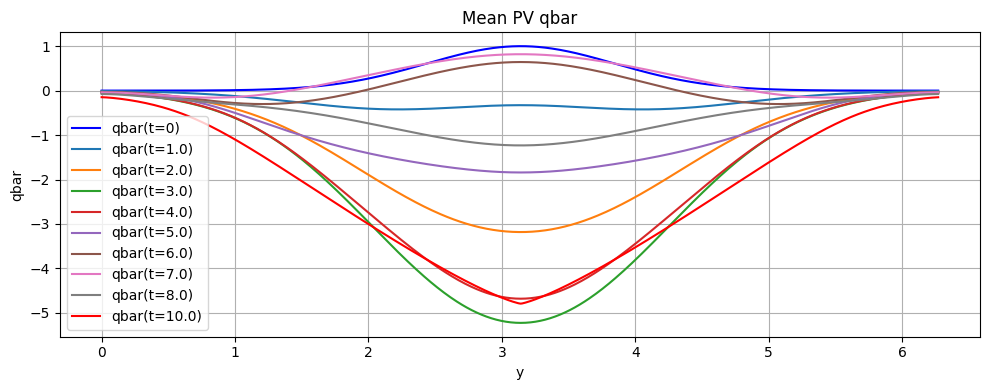

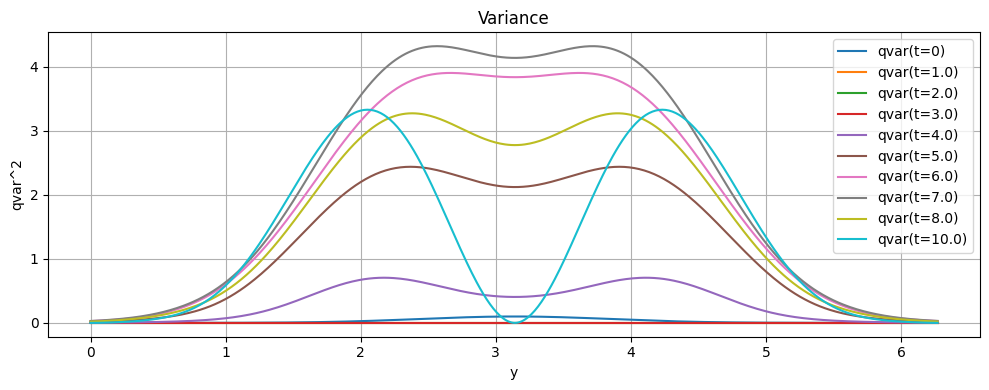

In [ ]:
# Hw1-4-3 Forcing
# Numerical simulation of the closed mean+variance system using 6th-order finite differences (periodic)
# RK4 in time. Domain: y in [0, 2*pi].
# Equations:
#   d/dt qbar  = d/dy( K_q * d/dy qbar ) + Forcing
#   d/dt qvar  = 2 * K_q * (d/dy qbar)^2 + Forcing
# with K_q = K0 * sqrt(qvar)
# Initial conditions and parameters given by the user.
# We'll plot qbar and qvar at t=0 and t=t_final.

import numpy as np
import matplotlib.pyplot as plt
from math import pi
import os

# Parameters
L = 2*pi
K0 = 0.1
N = 512  # grid points (use reasonably high resolution)
y = np.linspace(0, L, N, endpoint=False)
dy = y[1] - y[0]

# Initial conditions
qbar0 = np.exp(- (y - pi)**2 )
qvar0  = 0.1 * np.exp(- (y - pi)**2 )

# Time stepping
t = 0.0
t_final = 10.0
dt = 1e-4  # small dt for stability; RK4 will be used
nstep = int(np.ceil(t_final / dt))
dt = t_final / nstep  # adjust dt to fit exactly

# 6th-order central finite-difference first derivative coefficients (periodic)
# f'(x) ~ ( -f_{i+3} + 9 f_{i+2} -45 f_{i+1} +45 f_{i-1} -9 f_{i-2} + f_{i-3} ) / (60*h)
def ddy_6th_periodic(f, dy):
    # assume f is periodic on grid of length N
    # use np.roll for periodic indexing
    return ( -np.roll(f, -3) + 9*np.roll(f, -2) - 45*np.roll(f, -1)
             + 45*np.roll(f, 1) - 9*np.roll(f, 2) + np.roll(f, 3) ) / (60.0 * dy)

# Right-hand sides
omega_forcing=0.3
def rhs(qbar, qvar, time):
    # compute K_q
    # to avoid sqrt of zero, add small floor
    eps = 1e-12
    Kq = K0 * np.sqrt(np.maximum(qvar, eps))
    # compute dqdy using 6th order
    dqdy = ddy_6th_periodic(qbar, dy)
    # compute flux = Kq * dqdy
    flux = Kq * dqdy
    # compute d/dy of flux
    dfluxdy = ddy_6th_periodic(flux, dy)
    # mean eqn: dqbar/dt = dfluxdy + Forcing
    dqbar_dt = dfluxdy -3*np.exp(-(y-np.pi)**2/2)*np.sin(omega_forcing*np.pi*time)
    # variance eqn: dvar/dt = 2 * Kq * (dqdy)^2 + Forcing
    dqvar_dt = 2.0 * Kq * (dqdy**2)  -2.0*np.exp(-(y-np.pi)**2/2)*np.sin(omega_forcing*np.pi*time)
    return dqbar_dt, dqvar_dt

# Time integration (RK4)
qbar = qbar0.copy()
qvar = qvar0.copy()

saved = {0.0: (qbar.copy(), qvar.copy())}
# store snapshots for plotting
times_to_save = np.linspace(0,nstep,11,dtype=np.int64)
saved_data_qbar = np.array([qbar.copy()])
saved_data_qvar = np.array([qvar.copy()])
saved_data_time = np.array([0])
saved_data_qbar_center = np.array([qbar.copy()[N//2]])

for istep in range(nstep+1):
    k1_q, k1_v = rhs(qbar, qvar, t)
    k2_q, k2_v = rhs(qbar + 0.5*dt*k1_q, qvar + 0.5*dt*k1_v, t)
    k3_q, k3_v = rhs(qbar + 0.5*dt*k2_q, qvar + 0.5*dt*k2_v, t)
    k4_q, k4_v = rhs(qbar + dt*k3_q, qvar + dt*k3_v, t)

    qbar = qbar + (dt/6.0)*(k1_q + 2*k2_q + 2*k3_q + k4_q)
    qvar = qvar  + (dt/6.0)*(k1_v + 2*k2_v + 2*k3_v + k4_v)
    qvar = np.maximum(qvar, 0.0)

    # save data
    saved_data_qbar_center = np.append(saved_data_qbar_center, [qbar.copy()[N//2]], axis=0)
    if istep in times_to_save[1:]:
        saved_data_qbar = np.append(saved_data_qbar, [qbar.copy()], axis=0)
        saved_data_qvar = np.append(saved_data_qvar, [qvar.copy()], axis=0)
        saved_data_time = np.append(saved_data_time, [np.round(t,3)])

        print(istep,t,saved_data_qbar.shape,saved_data_qvar.shape,saved_data_time.shape)
    t += dt

# save final
saved[t_final] = (qbar.copy(), qvar.copy())

if not os.path.exists('fig'):
    os.makedirs('fig')
# Plot results
plt.figure(figsize=(10,4))
plt.plot(y, saved[0.0][0], label='qbar(t=0)',color='b')
for i in range(1,saved_data_time.shape[0]-2):
    plt.plot(y, saved_data_qbar[i,:], label=f'qbar(t={saved_data_time[i]})')
plt.plot(y, saved[t_final][0], label=f'qbar(t={t_final})',color='r')
plt.xlabel('y')
plt.ylabel('qbar')
plt.title('Mean PV qbar')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('fig/qbar_4-3.png')
plt.show()

plt.figure(figsize=(10,4))
plt.plot(y, saved[0.0][1], label='qvar(t=0)')
for i in range(1,saved_data_time.shape[0]-2):
    plt.plot(y, saved_data_qvar[i,:], label=f'qvar(t={saved_data_time[i]})')
plt.plot(y, saved[t_final][1], label=f'qvar(t={t_final})')
plt.xlabel('y')
plt.ylabel("qvar^2")
plt.title('Variance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('fig/qvar_4-3.png')
plt.show()


if not os.path.exists('output_data'):
    os.makedirs('output_data')
np.save('output_data/saved_data_qbar_4-3.npy', saved_data_qbar)
np.save('output_data/saved_data_qvar_4-3.npy', saved_data_qvar)
np.save('output_data/saved_data_time_4-3.npy', saved_data_time)
np.save('output_data/saved_data_qbar_center_4-3.npy', saved_data_qbar_center)

# Also show snapshots as image (time evolution not saved - but we can show initial/final)
# Save numeric output to file for further inspection

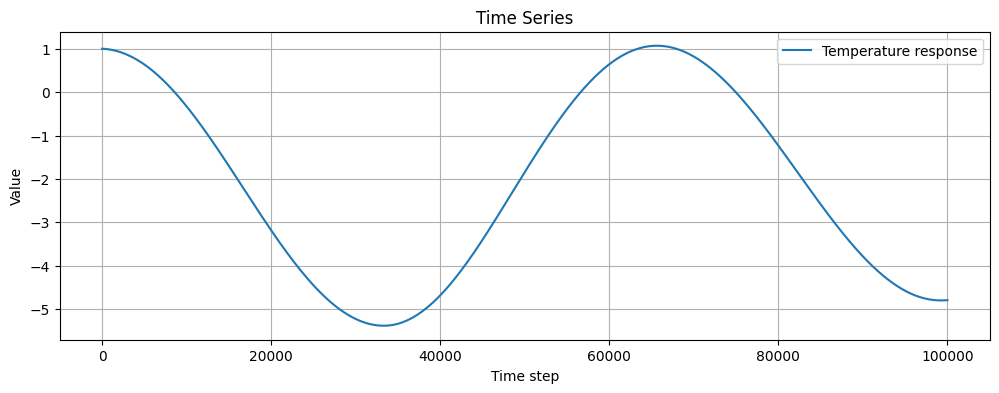

主要頻率: 1.999960e-05 (1/時間單位)
對應週期: 50001.00 個時間點


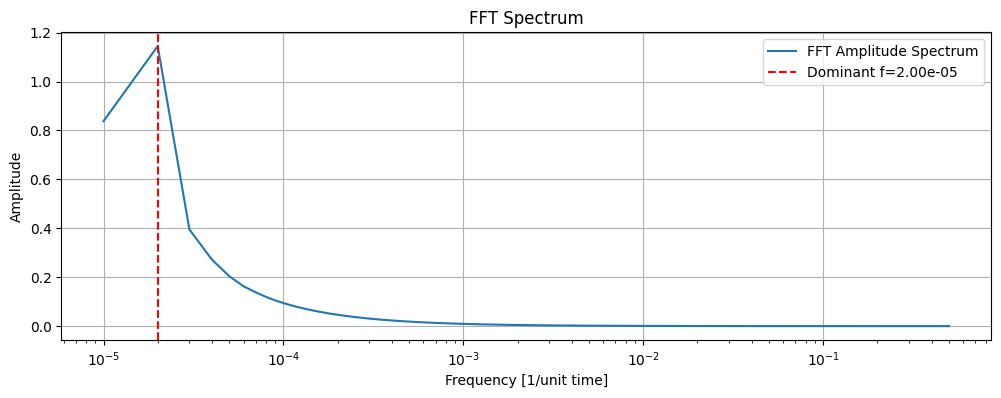

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 讀取資料
data = np.load('output_data/saved_data_qbar_center_4-3.npy')

# 時間軸 (假設每個點間隔為 1 單位時間)
dt = 1.0
N = len(data)
time = np.arange(N) * dt

# --- 繪製時間序列 ---
plt.figure(figsize=(12, 4))
plt.plot(time, data, label='Temperature response')
plt.xlabel("Time step")
plt.ylabel("Value")
plt.title("Time Series")
plt.legend()
plt.grid(True)
plt.show()

# --- FFT ---
fft_vals = np.fft.fft(data)
fft_freqs = np.fft.fftfreq(N, d=dt)
fft_amplitude = np.abs(fft_vals) / N

# 只取正頻率
pos_mask = fft_freqs > 0
fft_freqs = fft_freqs[pos_mask]
fft_amplitude = fft_amplitude[pos_mask]

# --- 找主頻率 ---
dominant_idx = np.argmax(fft_amplitude)   # 最大峰值的位置
dominant_freq = fft_freqs[dominant_idx]  # 主頻率
dominant_period = 1 / dominant_freq      # 主週期

print(f"主要頻率: {dominant_freq:.6e} (1/時間單位)")
print(f"對應週期: {dominant_period:.2f} 個時間點")

# --- 繪製頻譜 ---
plt.figure(figsize=(12, 4))
plt.plot(fft_freqs, fft_amplitude, label="FFT Amplitude Spectrum")
plt.axvline(dominant_freq, color='r', linestyle='--', label=f"Dominant f={dominant_freq:.2e}")
plt.xlabel("Frequency [1/unit time]")
plt.ylabel("Amplitude")
plt.title("FFT Spectrum")
plt.legend()
plt.grid(True)
plt.xscale('log') # Set x-axis to log scale
plt.show()


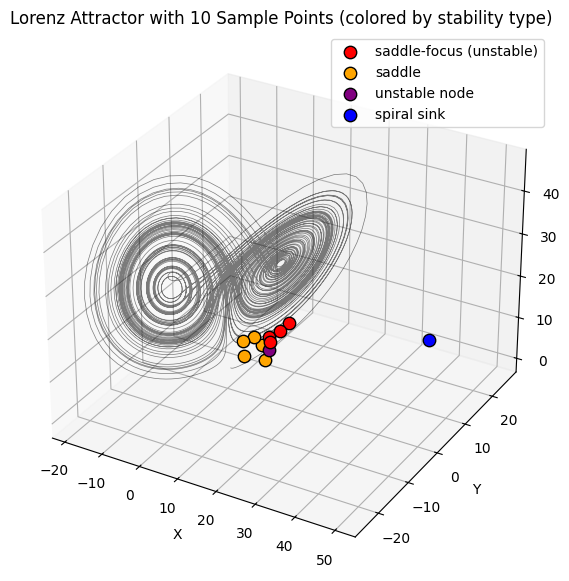

Point 0: (5.4881350392732475, 7.151893663724195, 6.027633760716439) → saddle-focus (unstable)
Point 1: (4.17022004702574, 7.203244934421581, 0.0011437481734488664) → saddle
Point 2: (4.359949021420038, 0.25926231827891333, 5.496624778787091) → saddle
Point 3: (5.507979025745755, 7.081478226181048, 2.9090473891294435) → unstable node
Point 4: (9.670298390136766, 5.4723224917572235, 9.726843599648843) → saddle-focus (unstable)
Point 5: (2.219931710897395, 8.707323061773764, 2.067191553394264) → saddle
Point 6: (8.928601514360016, 3.3197980530117723, 8.212291230578318) → saddle-focus (unstable)
Point 7: (0.7630828937395717, 7.7991879224011464, 4.384092314408935) → saddle
Point 8: (8.734294027918162, 9.68540662820932, 8.691945402139199) → saddle-focus (unstable)
Point 9: (50, 3.0, 20) → spiral sink
Point 10: (0.10374153885699955, 5.018745921487388, 4.957732931341461) → saddle


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Lorenz 系統參數
sigma = 10.0
beta = 8/3
rho = 24.74

# Jacobian
def jacobian_lorenz(x, y, z, sigma=10.0, rho=24.74, beta=8/3):
    return np.array([[-sigma, sigma, 0.0],
                     [rho - z, -1.0, -x],
                     [y, x, -beta]], dtype=float)

# 使用者的 10 個點
points = [
    (5.4881350392732475, 7.151893663724195, 6.027633760716439),
    (4.17022004702574, 7.203244934421581, 0.0011437481734488664),
    (4.359949021420038, 0.25926231827891333, 5.496624778787091),
    (5.507979025745755, 7.081478226181048, 2.9090473891294435),
    (9.670298390136766, 5.4723224917572235, 9.726843599648843),
    (2.219931710897395, 8.707323061773764, 2.067191553394264),
    (8.928601514360016, 3.3197980530117723, 8.212291230578318),
    (0.7630828937395717, 7.7991879224011464, 4.384092314408935),
    (8.734294027918162, 9.68540662820932, 8.691945402139199),
    (50, 3.0, 20),
    (0.10374153885699955, 5.018745921487388, 4.957732931341461)
]

# 穩定性分類
def classify_point(x, y, z):
    J = jacobian_lorenz(x, y, z)
    eigvals = np.linalg.eigvals(J)
    real_parts = np.real(eigvals)
    imag_parts = np.imag(eigvals)

    num_pos = np.sum(real_parts > 0)
    if np.any(np.abs(imag_parts) > 1e-6):  # 複數特徵值
        if np.any(real_parts > 0):
            return "saddle-focus (unstable)"
        else:
            return "spiral sink"
    else:  # 全部實數
        if num_pos == 1:
            return "saddle"
        elif num_pos == 2:
            return "unstable node"
        else:
            return "stable node"

types = [classify_point(*p) for p in points]

# 顏色對應
type_colors = {
    "saddle-focus (unstable)": "red",
    "spiral sink": "blue",
    "saddle": "orange",
    "unstable node": "purple",
    "stable node": "green"
}
colors = [type_colors[t] for t in types]

# Lorenz 系統數值積分（Euler 法）
def lorenz_step(x, y, z, dt=0.01):
    dx = sigma*(y - x)
    dy = x*(rho - z) - y
    dz = x*y - beta*z
    return x + dx*dt, y + dy*dt, z + dz*dt

# 吸引子軌跡
n_steps = 10000
dt = 0.01
x, y, z = 0., 1., 1.05
xs, ys, zs = [], [], []
for i in range(n_steps):
    x, y, z = lorenz_step(x, y, z, dt)
    xs.append(x)
    ys.append(y)
    zs.append(z)

# 畫圖
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs, ys, zs, color='black', alpha=0.5, linewidth=0.5) #'lightgray'

for (p, c, t) in zip(points, colors, types):
    ax.scatter(*p, color=c, s=80, edgecolor='k', label=t)

# 避免 legend 重複
handles, labels = ax.get_legend_handles_labels()
unique = dict(zip(labels, handles))
ax.legend(unique.values(), unique.keys())

ax.set_title("Lorenz Attractor with 10 Sample Points (colored by stability type)")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

# 輸出分類結果
for i, (p, t) in enumerate(zip(points, types)):
    print(f"Point {i}: {p} → {t}")
